In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [47]:
df = pd.read_csv('messages.csv', nrows=10)
df

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0
6,m . a . in scandinavian linguistics,m . a . in scandinavian linguistics at the uni...,0
7,call for papers : linguistics session of the m...,call for papers linguistics session - - midwes...,0
8,foreign language in commercials,content - length : 1937 greetings ! i ' m wond...,0
9,fulbright announcement : please post / dissemi...,fulbright announcement : please post / dissemi...,0


In [48]:
df.drop(columns=['subject'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10 non-null     object
 1   label    10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes


In [49]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopworks')
stop_words = set(stopwords.words('english'))

print("Number of stopwords:", len(stop_words))
print("Sample stopwords:", list(stop_words)[:10])

Number of stopwords: 198
Sample stopwords: ['the', 'until', 'here', 'and', 'not', 'now', "wouldn't", 'them', 'she', "we'll"]


[nltk_data] Error loading stopworks: Package 'stopworks' not found in
[nltk_data]     index


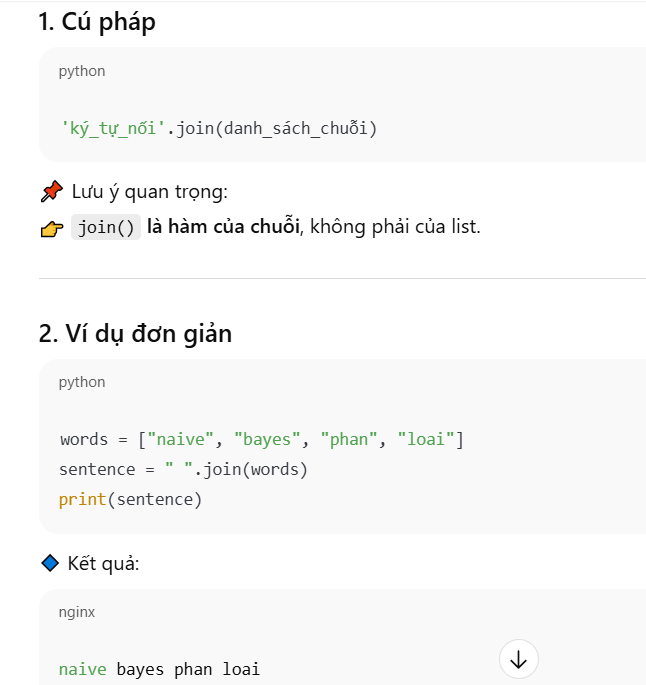

In [50]:
def remove_stopwords(df: pd.DataFrame, stop_words: set):
    new_message = []
    for text in df['message']:
        words = text.split()
        words_filters = []

        for word in words:
            if word not in stop_words:
                words_filters.append(words)
        
        mes = " ".join(words_filters)
        new_message.append(mes)
    df['message'] = new_message
    return df

In [60]:
def preprocess(df: pd.DataFrame):
    df['message'] = df['message'].str.lower() # lower
    df = df.apply(remove_stopwords(df, stop_words=stop_words))

In [61]:
df_new = preprocess(df)
df_new

TypeError: sequence item 0: expected str instance, list found